# **Deep Learning based on Malaria Detection**


 Welcome to the project on Detecting Malaria cells. We will work with the microscopic images of the parasitized cells that contain the Plasmodium parasite which causes malaria and the uninfected cells that are free of the Plasmodium parasites.

--------------
## **Context** 
--------------
Malaria is one of the most severe public health problems worldwide. It is a leading cause of death and disease in many developing countries, where young children and pregnant women are the groups most affected.What's the point of technology when it can't help the needy and save lives. 
Deep learning helps us to build robust, scalable and effective solutions which can be adopted by everyone even in remote corners of the world.
It would therefore be highly beneficial to propose a method that performs malaria detection using Deep Learning Algorithms



The dataset used for this system is a set of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:

**Parasitized**: The parasitized cells contain the Plasmodium parasite which causes malaria

**Uninfected**: The uninfected cells are free of the Plasmodium parasites



----------------
## **Problem definition for Deep Learning-based Malaria Detection**
----------------
The main aim of this malaria detection system is to address the challenges in the existing system by automating the process of malaria detection using Machine learning and image processing, and also, to build a feed-forward model that can recognize the infected and uninfected Malaria cells in the images, using Classification,Convolutional Neural Networks, Keras and Tensorflow.



----------------
## **Objective**
----------------

Build an efficient computer vision model to detect malaria.The model should identify whether the image of a red blood cell is that of one infected with malaria or not,and classify the same as parasitized or uninfected, respectively.


-------------
## **Dataset**
-------------
Here, we will use the Malaria Cell Images dataset to classify cells as either Parasitized or Uninfected. we'll use Convolutional Neural Networks to make the classification.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [1]:

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.8.2


## **Load the dataset**

- Let us now load the dataset that is available as a zip file cell_images.zip
- Split the data into the train and the test dataset.

In [4]:
#Storing the path of the data file from the Google drive

path = '/content/drive/MyDrive/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

**Image preprocessing**

This is the first stage. The aim of data preprocessing is to clean the cell images. This stage will remove the unwanted noise.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. 



In [5]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

Let's create the labels for both types of images so, we will be  able to train and test the model , and ,do the same for the training data first and then we will use the same code for the test data as well.

In [6]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder

for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [8]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

**Checking the shape of train and test images**

In [9]:
#Shape of images

print("Shape:", train_images[0].shape)

print()

print("Shape:",test_images[0].shape)

Shape: (64, 64, 3)

Shape: (64, 64, 3)


In [10]:
len(train_images), len(test_images)

(24958, 2600)

**Checking the shape of train and test labels**

In [11]:
#Shape of labels

print("Shape:", train_labels[0].shape)

print()

print("Shape:",test_labels[0].shape)

Shape: ()

Shape: ()


**Observation**
- There are 24,958 images in the training data and 2,600 images in the testing data. 
- We notice that Images and labels doesn't have the same dimension, we got image shape[64,64,3] and labels shape[0].

let's check the minimum and maximum range of pixel values for train and test images

**Minimum and Maximum range of pixel values for train and test images**

In [12]:
#Maximum range of pixel values for train and test images

print("Max_pixel_value_train_images:", np.max(train_images))

print()

print("Max_pixel_value_test_images:",np.max(test_images))


Max_pixel_value_train_images: 255

Max_pixel_value_test_images: 255


In [13]:
#Minimum range of pixel values for train and test images

print("Min_pixel_value_train-images:", np.min(train_images))

print()

print("Max_pixel_value_test_images:",np.min(test_images))


Min_pixel_value_train-images: 0

Max_pixel_value_test_images: 0


**Observation:**
- The range of pixel values are integers that range from 0  to 255 .


Let's count the number of values in both uninfected and parasitized.

In [14]:
#First lets convert our numpy array to pandas dataframe
df_train = pd.DataFrame(train_labels)
df_train

,0
0,1
1,1
2,1
3,1
4,1
...,...
24953,0
24954,0
24955,0
24956,0


In [15]:
df_test =pd.DataFrame(test_labels)
df_test

,0
0,1
1,1
2,1
3,1
4,1
...,...
2595,0
2596,0
2597,0
2598,0


In [16]:
#Parasitized cells counts

df_train.value_counts()

1    12582
0    12376
dtype: int64

In [17]:
#Uninfected cells counts

df_test.value_counts()

0    1300
1    1300
dtype: int64

**Normalizing the images**

In [17]:
#normalizing the train and test images by dividing it by 255 and convert them to float32 using astype function

train_images = ( train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

In [18]:
# New shape 

print('Training set:', train_images.shape, train_labels.shape)

print('Test set:', test_images.shape, test_labels.shape)

Training set: (24958, 64, 64, 3) (24958,)
Test set: (2600, 64, 64, 3) (2600,)


**Observation:**
- By shaping the dataset we were able to give a 4D array as input.That will help pass them to CNNs.
- We notice that 


**Visualizing images**

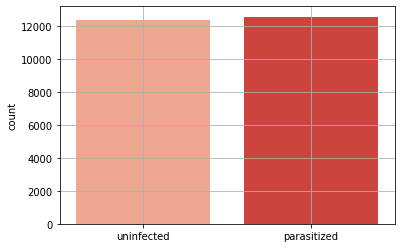

In [19]:
# Let's plot to check if the data is balanced

#Train Labels
sns.countplot(train_labels, palette='Reds')
plt.xticks([0,1],['uninfected', 'parasitized'])
plt.grid(True)

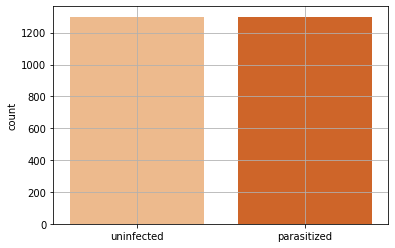

In [20]:
#Test labels
sns.countplot(test_labels,palette='Oranges')
plt.xticks([0,1],['uninfected', 'parasitized'])
plt.grid(True)


Observation:
- After plotting the data It looks like we have a balanced dataset with 12,000 malaria(parasitized) and 12,000 non-malaria (uninfected) cell images. 

**Data Exploration**

Let's visualize the images from the train data

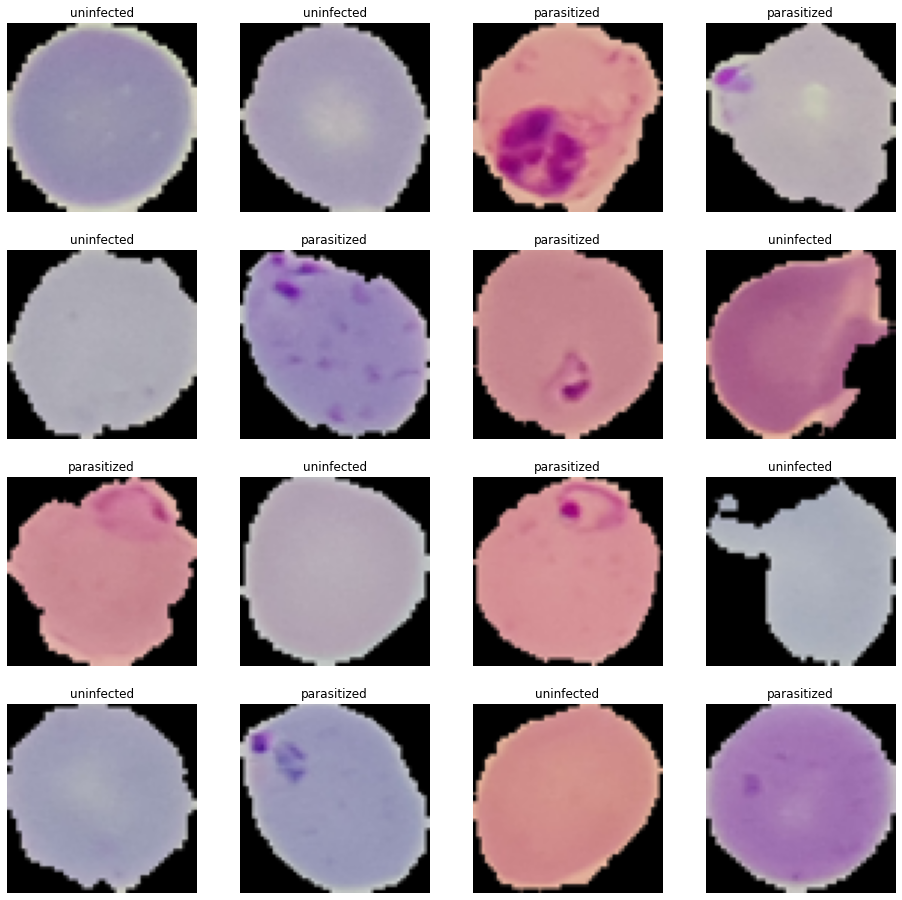

In [21]:


np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

**Observation and insights:**
- We can see from the above plot that we are able to  differentiate the parasite cells(pink color) compared to the uninfected ones.

Lets look further.

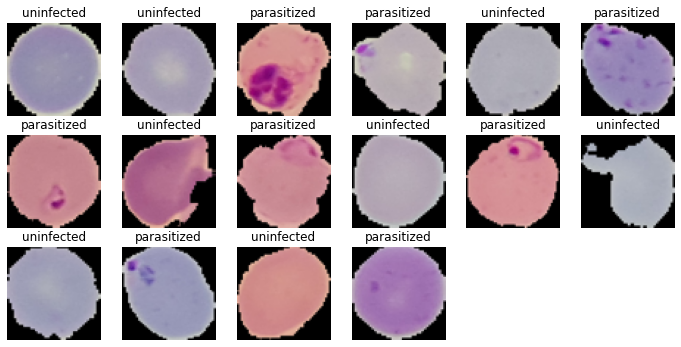

In [22]:
np.random.seed(42)
plt.figure(1 , figsize = (12 , 12))

for n in range(1, 17):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

**Observation:**
- We observe a distinct classification between the parasitized cells and the uninfected cells.
- Based on these sample images, we can see some subtle differences between malaria and healthy cell images. We will make our deep learning models try to learn these patterns during model training.



In [23]:
# Plotting the mean images for parasitized and uninfected

# function to find the mean

def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

***Mean image for parasitized***

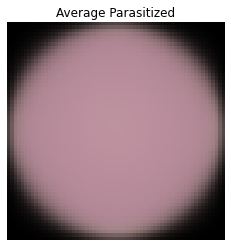

In [24]:

# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

**Mean image for uninfected**

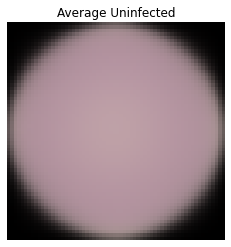

In [25]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
uninfected_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==0:
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean

**Observation:**
- there isn’t a big difference
between both images. The images are well-aligned, the same size and shape, possibly with different exposure.


Before can we start training our models, we must set up some basic configuration settings.

**Converting RGB to HSV of Images using OpenCV**

In [26]:
# Let's convert the train data

import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


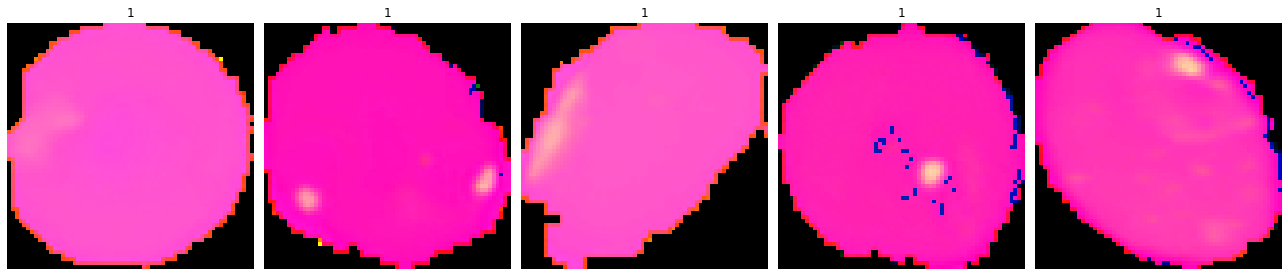

In [27]:
#Let's visualize for the images in the train data

viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


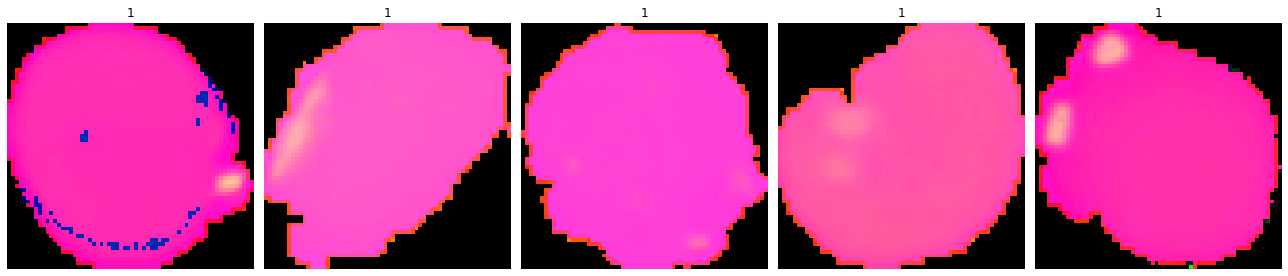

In [28]:
#Let's visualize for the images in the test data

viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Observation:**
- We can see that malaria parasites are present and  At every stage of its lifecycle, each species changes in its size, color, shape, and morphology. 

 **Processing Images using Gaussian Blurring**

**Gaussian Blurring on train data**

In [29]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

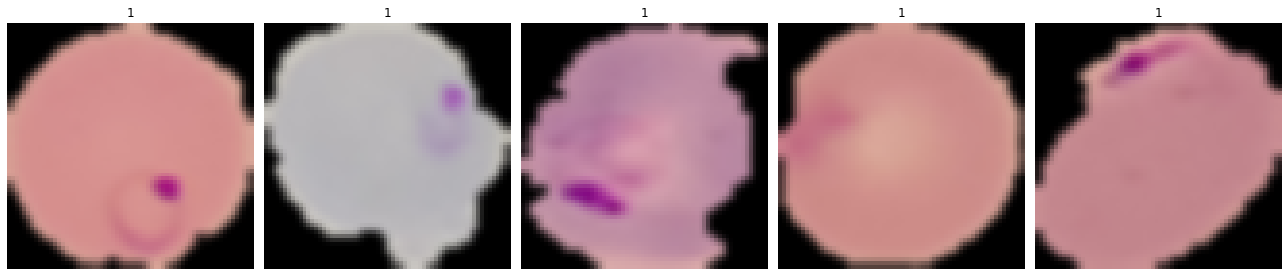

In [30]:
#Visualizing images on the train data

viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Gaussian Blurring on train data**

In [31]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)


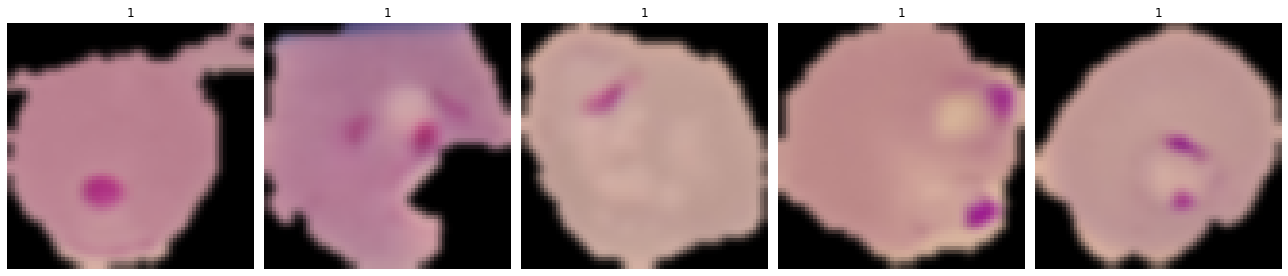

In [32]:
#Visualizing images on the test data

viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

*Observation:*
- By blurring the image we are able to identify parasite within affected cells.
The system that has been made is quite suitable where we can actually visualize images of infected  cells.


**Analysis**

**Proposed approach**

The deep learning architecture with the above configuration successfully achieved the the classification of malaria-infected blood cells.

However, this system can only be run by a Machine Learning Engineer who implements the calculations to perform classification into a program. Of course, the system created is not only for use by Machine Learning Engineers. Remember, the goal is to help health workers make it easier to diagnose. This means that this system must be run or operated by the user (in this case, the user in question is a health worker) to detect or classify which cell images are infected with malaria and which are not infected. 

For this reason, we need to create a Deep learning model, or more specifically a convolutional neural network (CNNs). This model have proven very effective in a wide variety of computer vision tasks, t will be beneficial and easier for health workers or users to operate.

The key layers in a CNN model include convolution and pooling layers. Convolution layers learn spatial hierarchical patterns from data, which are also translation-invariant, so they are able to learn different aspects of images. For example, the first convolution layer will learn small and local patterns, such as edges and corners, a second convolution layer will learn larger patterns based on the features from the first layers, and so on. 
This allows CNNs to automate feature engineering and learn effective features that generalize well on new data points. Pooling layers will help us with down sampling and dimension reduction.

Thus, CNNs help with automated and scalable feature engineering. Also, plugging in dense layers at the end of the model enables us to perform tasks like image classification. 
Automated malaria detection using deep learning models like CNNs could be very effective, cheap, and scalable, especially with the advent of transfer learning and pre-trained models that work quite well, even with constraints like less data.

Measures of success Our focus is to try some simple CNN models from scratch and a couple of pre-trained models using transfer learning to see the results we can get on the same dataset. We will use open source tools and frameworks, including Python and TensorFlow, to build our models.
To evaluate the success of our different models we will cover different types of evaluation metrics:
•	Classification Accuracy
•	Logarithmic Loss
•	Confusion Matrix
•	Area under Curve
•	F1 Score
•	Mean Absolute Error
•	Mean Squared Error




**One Hot Encoding on the train and test labels**

In [33]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

 **Importing the required libraries**

In [34]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Building the model**

**Base line Model Building**


In the model training phase, we will build deep learning models, train them with our training data, and compare their performance using the validation data. We will then save these models and use them later in the model evaluation phase.

In [35]:
#creating sequential model

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [36]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
#Using Callbacks

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [38]:
#Fit and train our Model
history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 17s 7ms/step - loss: 0.4403 - accuracy: 0.7813 - val_loss: 0.1667 - val_accuracy: 0.9603
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1274 - accuracy: 0.9555 - val_loss: 0.0931 - val_accuracy: 0.9892
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0920 - accuracy: 0.9692 - val_loss: 0.0700 - val_accuracy: 0.9866
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0785 - accuracy: 0.9752 - val_loss: 0.0811 - val_accuracy: 0.9836
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0698 - accuracy: 0.9767 - val_loss: 0.0795 - val_accuracy: 0.9814


In [39]:
#Evaluating the model on test data

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9804

 Test_Accuracy:- 0.9803845882415771


**Observation:**

We got a validation accuracy of 98%, which is pretty good, although our model looks to be overfitting . We can get a clear perspective on this by plotting the confusion matrix, training ,validation accuracy and loss curves.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



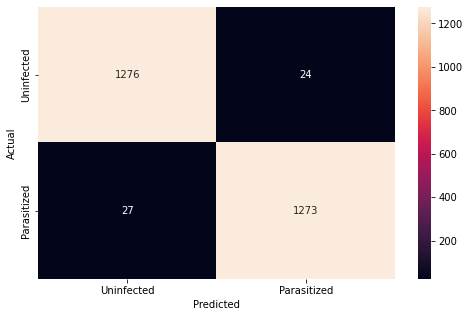

In [41]:
#Plotting the confusion matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [42]:
#Plotting the train and validation curves

# function to plot train and validation accuracy 

def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

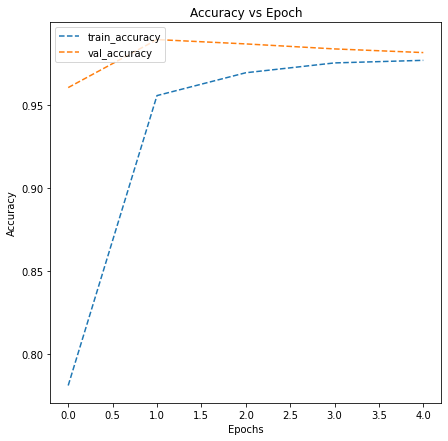

In [43]:
plot_accuracy(history)

**Observation and insights:**

- Here we can clearly observe that the training and validation accuracy are increasing
- And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

Moldel 1 : **improve the performance of our model by adding new layers**

In [45]:
#Model1

#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Building Model 1**
 Let's add two convolutional layer

In [46]:
#creating sequential model
model1=Sequential()

model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(500,activation="relu"))
model1.add(Dropout(0.4))
model1.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [47]:
# Compiling the model

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
#Using callbacks 

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [49]:
 #Fit and train our Model

history1= model1.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 6s 8ms/step - loss: 0.3624 - accuracy: 0.8112 - val_loss: 0.0844 - val_accuracy: 0.9872
Epoch 2/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0952 - accuracy: 0.9699 - val_loss: 0.0726 - val_accuracy: 0.9816
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0802 - accuracy: 0.9741 - val_loss: 0.0494 - val_accuracy: 0.9870
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0795 - accuracy: 0.9751 - val_loss: 0.0831 - val_accuracy: 0.9738
Epoch 5/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0677 - accuracy: 0.9779 - val_loss: 0.0609 - val_accuracy: 0.9796


In [50]:
# Evaluating the model on test data

accuracy= model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9831

 Test_Accuracy:- 0.9830769300460815


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



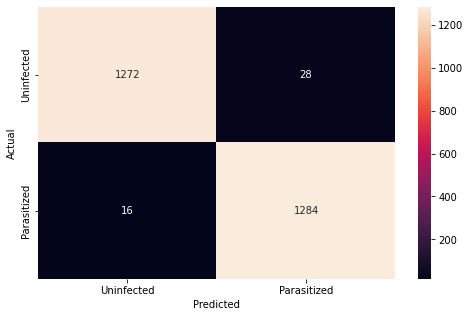

In [51]:
#Plotting the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [52]:
#Plotting the train and validation curves

# function to plot train and validation accuracy 
def plot_accuracy(history1):
    N = len(history1.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history1.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history1.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

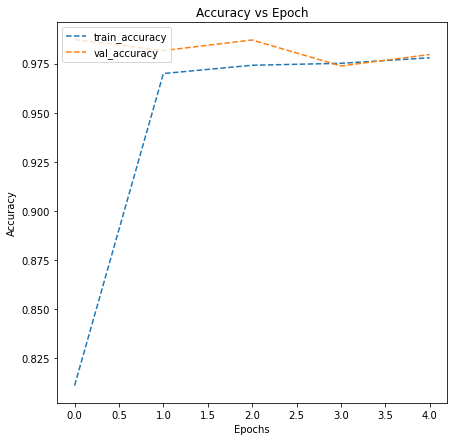

In [53]:
plot_accuracy(history1)

**Observation**
- we notice that after adding two layers it gives us a validation accuracy of almost 98% and, based on the training accuracy, it doesn't look like our model is overfitting as much as our first model. This can be verified with the following learning curve above.

- The validation accuracy is bit fluctuating but overall it is also increasing with the increase in epochs. Same as training accuracy, validation accuracy also has a rapid increase up to around 2 epochs and then has lower increase, almost like a constant.

- The overal **accuracy of this model is better than the baseline model.** *

Let's build a model with LeakyRelu as the activation function.

Can the model performance be improved if we change our activation function to LeakyRelu?

Can BatchNormalization improve our model?

Let us try to ** build a model using BatchNormalization and using LeakyRelu as our activation function.**


**Model 2 with Batch Normalization**

In [139]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [140]:
#Building the Model2

model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
model2.add(LeakyReLU(0.1))

model2.add(Conv2D(32, (3, 3),input_shape = (32, 32, 1),  padding = "same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(BatchNormalization())

model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
model2.add(LeakyReLU(0.1))



model2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512))
model2.add(LeakyReLU(0.1))
model2.add(Dropout(0.4))

model2.add(Dense(2,activation="softmax"))

adam = optimizers.Adam(learning_rate=0.001)


model2.summary()

    








Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                          

In [141]:
#Compiling the model

model2.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])

In [142]:
#Using callbacks 

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [143]:
#Fit and train the model

history2 = model2.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 7s 10ms/step - loss: 0.4122 - accuracy: 0.8808 - val_loss: 0.0326 - val_accuracy: 0.9962
Epoch 2/20
624/624 [==============================] - 6s 9ms/step - loss: 0.1265 - accuracy: 0.9632 - val_loss: 0.0451 - val_accuracy: 0.9936
Epoch 3/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0971 - accuracy: 0.9728 - val_loss: 0.0888 - val_accuracy: 0.9898


In [144]:
#Evaluating the model on test data

accuracy = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0982 - accuracy: 0.9862

 Test_Accuracy:- 0.9861538410186768


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



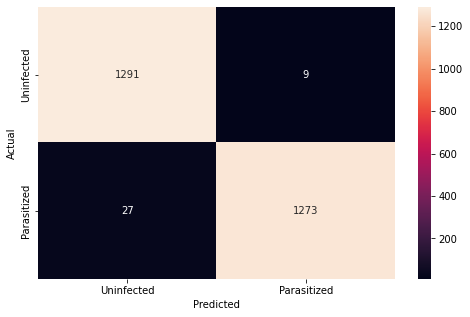

In [145]:
#Plotting the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [146]:
#Plotting the train and validation accuracy

def plot_accuracy(history2):
    N = len(history2.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history2.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

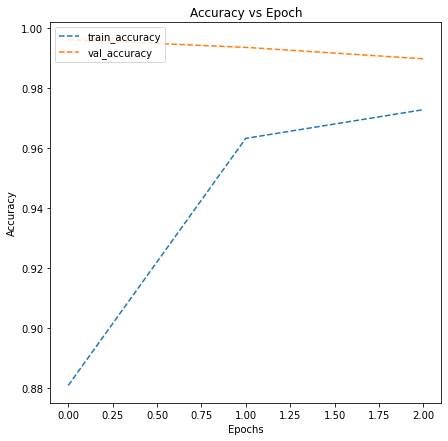

In [147]:
plot_accuracy(history2)

**Observations and insights:**

- We have received a base accuracy of 98% with high precision(99) and recall (98) towards classifying the infected and normal cells which is reasonable. 
- By investigating the confusion matrix as shown above ,we can see that the count for False Negatives (FN) is high of  27 ..
- Learning curve of this  underfit model has a high validation loss at the beginning which gradually lowers upon adding training examples and suddenly falls to an arbitrary minimum at the end .
- Training loss and validation loss are close to each other at the end.

Can we improve the model with Image Data Augmentation?

Let's check with creating a model with data augmentation.

**Model 3 with Data Augmentation**

In [76]:
#Model 3 with Data Augmentation

#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [77]:
# Using image data generator

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images

train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                  zoom_range = 0.5, rotation_range=30)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)

**Visualization of  Augmented images**

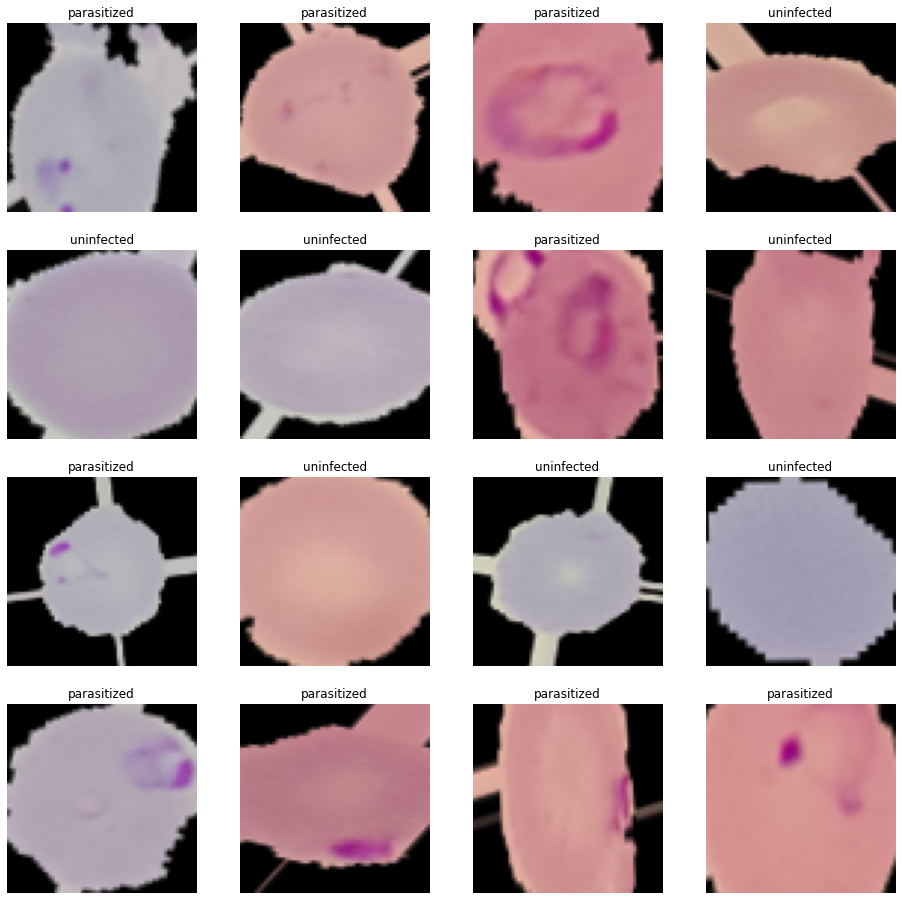

In [78]:
#Visualizing Augmented images

#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 4))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

**Observations and insights**:

- The infected cells seem to contain some red globular structures whereas healthy cells do not seem to contain such structures in them. The proposed deep learning model will be used to identify these patterns in cell images to effectively detect malaria parasites in a patient.

In [79]:
#Building the model

model3=Sequential()
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))


model3.add(Flatten())

model3.add(Dense(512,activation="relu"))
model3.add(Dropout(0.4))
model3.add(Dense(2,activation="softmax"))#2 represent output layer neurons 

adam = optimizers.Adam(learning_rate=0.001)
model3.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])
model3.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [80]:
#Using callbacks

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [81]:
# Fit and train 

history3 = model3.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=64,callbacks=callbacks,
                                  epochs=20,verbose=1)

Epoch 1/20
312/312 [==============================] - 24s 74ms/step - loss: 0.6482 - accuracy: 0.6276 - val_loss: 0.5438 - val_accuracy: 0.8287
Epoch 2/20
312/312 [==============================] - 23s 73ms/step - loss: 0.3309 - accuracy: 0.8672 - val_loss: 0.1390 - val_accuracy: 0.9535
Epoch 3/20
312/312 [==============================] - 23s 73ms/step - loss: 0.2073 - accuracy: 0.9224 - val_loss: 0.1438 - val_accuracy: 0.9593
Epoch 4/20
312/312 [==============================] - 23s 74ms/step - loss: 0.1860 - accuracy: 0.9346 - val_loss: 0.1302 - val_accuracy: 0.9617
Epoch 5/20
312/312 [==============================] - 23s 73ms/step - loss: 0.1776 - accuracy: 0.9377 - val_loss: 0.1041 - val_accuracy: 0.9698
Epoch 6/20
312/312 [==============================] - 23s 74ms/step - loss: 0.1646 - accuracy: 0.9451 - val_loss: 0.1040 - val_accuracy: 0.9740
Epoch 7/20
312/312 [==============================] - 23s 74ms/step - loss: 0.1702 - accuracy: 0.9443 - val_loss: 0.0913 - val_accuracy:

In [82]:
#Evaluating the model on test data

accuracy = model3.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 4ms/step - loss: 0.0732 - accuracy: 0.9773

 Test_Accuracy:- 0.9773076772689819


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.98      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



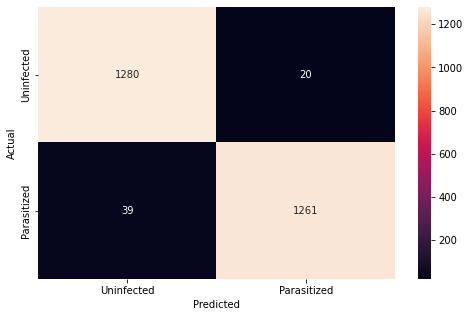

In [83]:
#Plotting the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [84]:
#Plotting the train and validation accuracy

def plot_accuracy(history3):
    N = len(history3.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history3.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history3.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

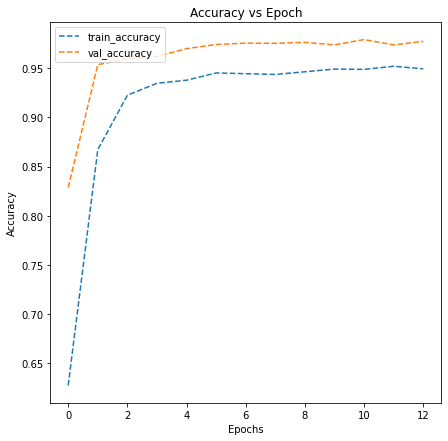

In [85]:
plot_accuracy(history3)

Observation:
- We can see from the above plot that the model has done poorly on the validation data.
- The model is overfitting the training data.

Now let us try to use a pretrained model like VGG16 and check how it performs on our data.

**Pre-trained model (VGG16)**

In [92]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [93]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons

x = BatchNormalization()(x)
pred = Dense(64, activation='softmax')(x)

model4 = Model(vgg.input, pred) #Initializing the model

In [94]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [95]:
#Compiling the model

model4.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])

In [96]:
#Using callbacks 

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [97]:
#Fitting the model and running the model for 10 epochs
history4 = model.fit(
            X_train, y_train,
            epochs=10,
            callbacks=callbacks,
            validation_split=0.2,
            batch_size=32,
            verbose=1
)

Epoch 1/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0738 - accuracy: 0.9762 - val_loss: 0.0663 - val_accuracy: 0.9797
Epoch 2/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0699 - accuracy: 0.9772 - val_loss: 0.0733 - val_accuracy: 0.9787
Epoch 3/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0646 - accuracy: 0.9781 - val_loss: 0.0617 - val_accuracy: 0.9807
Epoch 4/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0673 - accuracy: 0.9778 - val_loss: 0.0640 - val_accuracy: 0.9807
Epoch 5/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0619 - accuracy: 0.9780 - val_loss: 0.0608 - val_accuracy: 0.9805
Epoch 6/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0633 - accuracy: 0.9785 - val_loss: 0.0606 - val_accuracy: 0.9815
Epoch 7/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0616 - accuracy: 0.9787 - val_loss: 0.0620 - val_accuracy: 0.9792
Epoch 

In [100]:
#Plotting the train and validation accuracy

def plot_accuracy(history4):
    N = len(history4.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history4.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history4.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

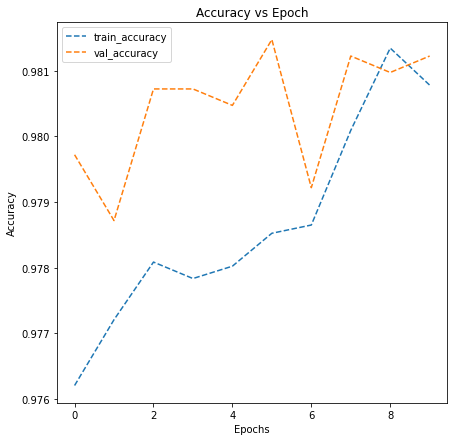

In [101]:
plot_accuracy(history4)

**Observations and insights**

- It gives us a validation accuracy of almost 98% and, based on the training accuracy, it doesn't look like our model is overfitting as much as model3. 
-  but the performance is slightly less than ourCNN model with data augmenation. 

**Results**


We have adopted the following approach in order to assess the performance of the proposed CNN model for the classification of uninfected and parasitized cell images.

- **Base Model:**

As mentioned in the previous section, our base model represents the custom model.We can see that our base model does not converge well and a significant difference between the training and validation results both for loss and accuracy.In addition it is observed in the values of loss and accuracy, that the training progresses towards the end.This indicates that our base model is not trained well and might not generalize well on unseen test data. This could be potentially attributed to the choice of learning schedule in the base model even though we have used dropout.


**- Model 1 Improved Model with adding two layers**

In our improved model, we used the same base model architecture with the exception that we added two layers.
 it gives us a validation accuracy of almost 98% and, based on the training accuracy, it doesn't look like our model is overfitting as much as our first model. This can be verified with the following learning curve above.

 The validation accuracy is also increasing with the increase in epochs. Same as training accuracy, validation accuracy also has a rapid increase up to around 2 epochs and then has lower increase, almost like a constant.

We have received a base accuracy of 96.46% with high precision and recall towards classifying the infected and normal cells which is reasonable. By investigating the confusion matrix, we can see that the count for False Negatives (FN) is reduced to 16

FN indicates that the model declares a malaria patient to be healthy whereas the patient is parasitized. This will severely hamper the patient treatment and may result in death. Our goal is to reduce this number with the proposed improved model. A reduced number of FN will ensure that our model is effective in identifying parasitized cell images.

 The overall accuracy of this model is better than the baseline model.

**Model 2 with Batch Normalization**

To improve the performance of our previous model we added some Batch normalization and used LeakyRelu as our activation function.

We have received a base accuracy of 98% with high precision(99) and recall (98) towards classifying the infected and normal cells which is reasonable.
By investigating the confusion matrix as shown above ,we can see that the count for False Negatives (FN) is reduced to 27 ..
Learning curve of this underfit model has a high validation loss at the beginning which gradually lowers upon adding training examples and suddenly falls to an arbitrary minimum at the end .
Training loss and validation loss are close to each other at the end.

**Model 3 with Data Augmentation**

Amongst the popular deep learning applications, computer vision tasks such as image classification, object detection, and segmentation have been highly successful. Data augmentation can be effectively used to train the DL models in such applications.After Using ImageDataGenerator to generate images, we were able to see that The infected cells seem to contain some red globular structures whereas healthy cells do not seem to contain such structures in them. The proposed deep learning model with data augmentation will be used to identify these patterns in cell images to effectively detect malaria parasites in a patient.
it gives us a validation accuracy of 97%,unfortunately We can see from the above plot that the model has done poorly on the validation data.
The model is overfitting the training data.

**Deep transfer learning**

**Pre-trained model4 (VGG16)**

For building this model, we will leverage TensorFlow to load up the VGG-16 model and freeze the convolution blocks so we can use them as an image feature extractor. We will plug in our own dense layers at the end to perform the classification task.
After training our model using similar configurations and callbacks to the ones we used in our previous model.
we then plotted the train and validation accuracy for model 4, we notice  a validation accuracy of almost 98% and, based on the training accuracy, it doesn't look like our model is overfitting as much as model3.


**conclusion**

Our best model(model1) achieves an accuracy of 98 in classifying parasitized and uninfected cell images with a high degree of precision and sensitivity. 
The model also yields a high value of F1 score (98%) compared to all other existing models under study indicating a strong correlation between predicted and true labels. We also observed that the proposed improved model showed better performance compared to the customized and other CNN models (pretrained such as VGG-16)
Thus, we believe that the results obtained from this work will benefit towards developing valuable solutions so that reliability of the treatment and lack of medical expertise can be solved. As an immediate extension of this work, we will consider using image augmentation on the training data with the hope to further alleviate overfitting problem and different adaptive variants of the SGD optimizer to observe their impact on the performance results. In the future, we also plan to achieve better prediction by using ensemble methods through model stacking.

